In [718]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import tree

In [719]:
crime83 = pd.read_csv("83crime.csv")
crime83.rename(columns={"2012 [YR2012]":"Crime" }, inplace=True)  # remove spaces
crime83 = crime83.head(83)

In [720]:
education83 = pd.read_csv("83educ.csv")
education83.rename(columns={"2012 [YR2012]":"Education" }, inplace=True)  # remove spaces
education83 = education83.head(83)

In [721]:
unemployment83 = pd.read_csv("83unemp.csv")
unemployment83.rename(columns={"2012 [YR2012]":"Unemployment" }, inplace=True)  # remove spaces
unemployment83 = unemployment83.head(83)
gdp83 = pd.read_csv("83gdp.csv")
gdp83.rename(columns={"2012 [YR2012]":"GDP" }, inplace=True)  # remove spaces
gdp83 = gdp83.head(83)

In [722]:
data = education83.loc[:,"Education":"Education"]
data["Unemployment"] = unemployment83.loc[:,"Unemployment":"Unemployment"]
data["GDP"] = gdp83.loc[:,"GDP":"GDP"]
data["Crime"] = crime83.loc[:,"Crime":"Crime"]
data

,Education,Unemployment,GDP,Crime
0,58.565491,13.440000,4247.839852,5.50
1,32.231331,10.970000,5583.616152,1.30
2,43.914478,17.309999,3565.517575,2.20
3,85.413918,5.220000,67646.103853,1.10
4,72.314880,4.870000,48333.572727,1.00
5,20.438459,5.190000,7393.771877,2.20
6,90.437134,0.619000,6721.483351,3.60
7,71.244370,7.540000,44740.571702,1.80
8,24.332899,14.270000,4674.293447,43.10
9,30.802601,8.440000,85458.455508,7.90


In [723]:
trainData = data[:55]

In [724]:
trainData

,Education,Unemployment,GDP,Crime
0,58.565491,13.440000,4247.839852,5.5
1,32.231331,10.970000,5583.616152,1.3
2,43.914478,17.309999,3565.517575,2.2
3,85.413918,5.220000,67646.103853,1.1
4,72.314880,4.870000,48333.572727,1.0
5,20.438459,5.190000,7393.771877,2.2
6,90.437134,0.619000,6721.483351,3.6
7,71.244370,7.540000,44740.571702,1.8
8,24.332899,14.270000,4674.293447,43.1
9,30.802601,8.440000,85458.455508,7.9


In [725]:
features = trainData.values[:, :3]

In [726]:
a = trainData.values[:, 3:]
targetlist = []
for i in range (0, 55):
    if (a[i] > 10):
        targetlist.append(3)
    elif (a[i] <= 10 and a[i] > 3):
        targetlist.append(2)
    elif (a[i] <= 3 and a[i] > 2):
        targetlist.append(1)
    else:
        targetlist.append(0)

In [727]:
targetarray = np.asarray(targetlist)
targetarray

array([2, 0, 1, 0, 0, 1, 2, 0, 3, 2, 2, 0, 3, 0, 1, 0, 3, 2, 0, 0, 0, 0, 3,
       3, 3, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 1, 2, 0, 2,
       2, 0, 0, 0, 1, 3, 2, 2, 0])

In [728]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [729]:
clf.predict([[2., 2.]])

array([1])

In [730]:
clf.predict_proba([[2., 2.]])

array([[ 0.,  1.]])

In [731]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(features, targetarray)

In [732]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [733]:
with open("iris.dot", 'w') as f:
...     f = tree.export_graphviz(clf, out_file=f)

In [734]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris2.pdf")

True

In [735]:
feature_names = list(trainData.columns.values)

In [736]:
feature_names

['Education', 'Unemployment', 'GDP', 'Crime']

In [737]:
feature_names = feature_names[:3]

In [738]:
target_names = ['low', 'lower-intermediate', 'upper-intermediate', 'high']
target_names = np.asarray(target_names)

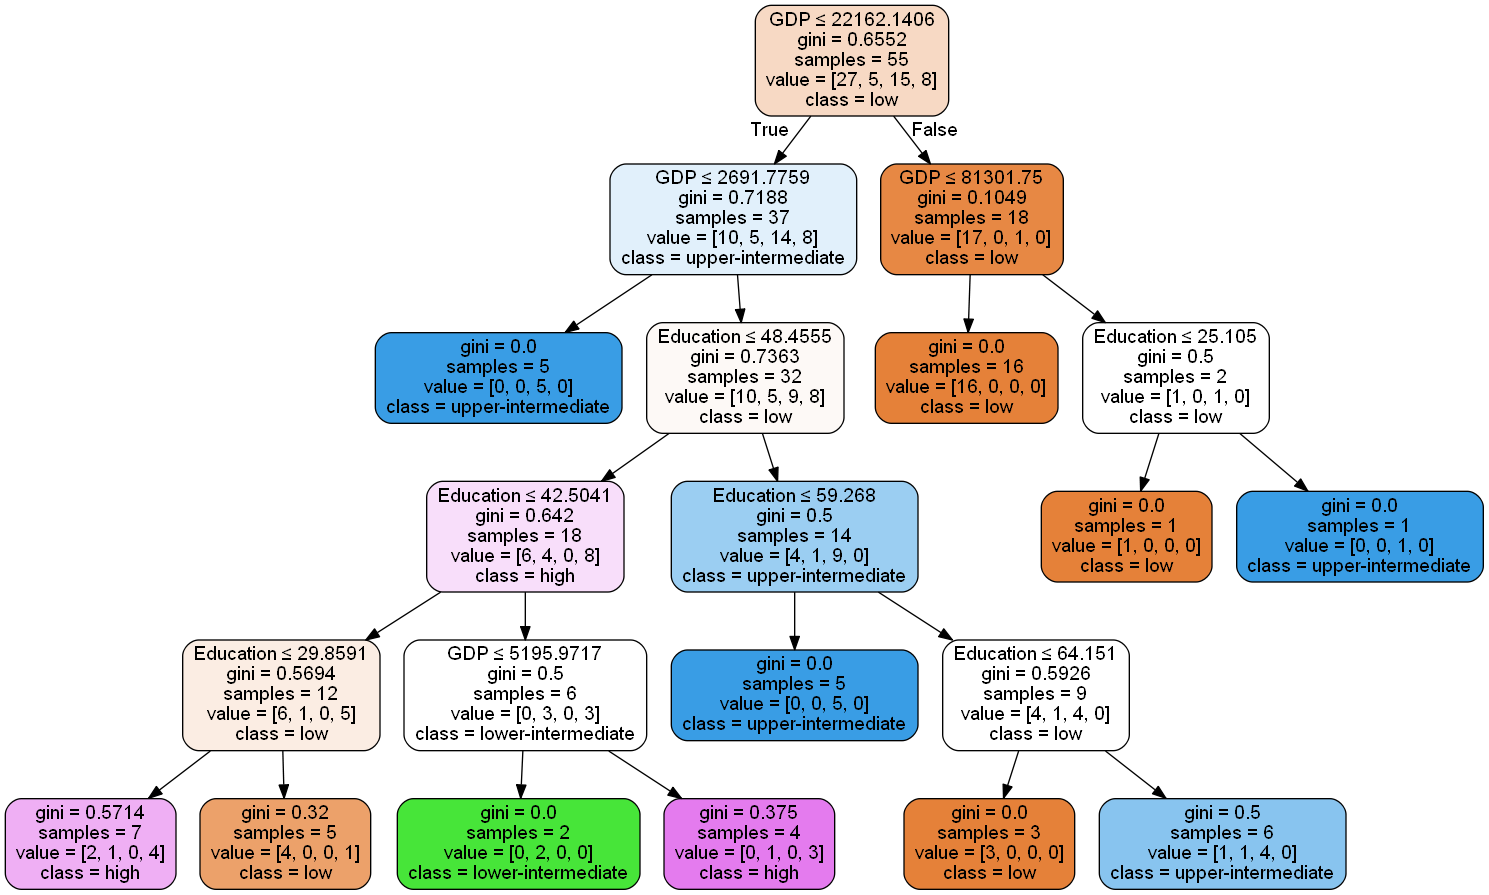

In [739]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names,  
                         class_names=target_names, filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [740]:
features[0]
trainData[1:2]

,Education,Unemployment,GDP,Crime
1,32.231331,10.97,5583.616152,1.3


In [741]:
clf.predict(features[1])

C:\Users\SUUSER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [742]:
testData = data[55:]

In [743]:
testData

,Education,Unemployment,GDP,Crime
55,78.501068,5.820000,49474.705606,0.90
56,80.843353,6.410000,40066.564800,0.90
57,73.251457,3.120000,101563.702678,0.50
58,44.149891,4.050000,10672.358955,17.50
59,31.298740,6.990000,2604.655997,8.80
60,72.848389,10.090000,13145.104842,0.99
61,68.585541,15.530000,20577.402638,1.20
62,86.565010,14.480000,27811.555799,26.50
63,11.932190,0.480000,92692.643312,7.20
64,54.520981,6.790000,8558.397606,1.90


In [744]:
t_features = testData.values[:, :3]

In [745]:
a = testData.values[:, 3:]
t_targetlist = []
for i in range (0, 28):
    if (a[i] > 10):
        t_targetlist.append(3)
    elif (a[i] <= 10 and a[i] > 3):
        t_targetlist.append(2)
    elif (a[i] <= 3 and a[i] > 2):
        t_targetlist.append(1)
    else:
        t_targetlist.append(0)

In [746]:
t_targetarray = np.asarray(t_targetlist)
t_targetarray

array([0, 0, 0, 3, 2, 0, 0, 3, 2, 0, 2, 2, 0, 0, 0, 3, 0, 2, 3, 0, 0, 2, 2,
       2, 0, 2, 0, 2])

In [747]:
clf.score(features, targetarray)

0.87272727272727268

In [748]:
clf.score(t_features, t_targetarray)

0.5

In [678]:
clf.predict(t_features[0:])

array([0, 0, 2, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 3, 0, 3, 3, 0, 2, 2, 0,
       2, 0, 0, 1, 2])

In [486]:
clf.predict_proba(t_features[0:])

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.25      ,  0.        ,  0.75      ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.16666667,  0.16666667,  0.66666667,  0.        ],
       [ 0.16666667,  0.16666667,  0.66666667,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.16666667,  0.16666667,  0.66666667,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.28571429,  0.14285714,  0.        ,  0.57142857],
       [ 1.        ,  0.